In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [45]:
data = pd.read_csv("/content/books.csv", error_bad_lines = False)
data.head()

Skipping line 3350: expected 12 fields, saw 13
Skipping line 4704: expected 12 fields, saw 13
Skipping line 5879: expected 12 fields, saw 13
Skipping line 8981: expected 12 fields, saw 13



,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


In [46]:
data.isnull().sum()

bookID                0
title                 0
authors               0
average_rating        0
isbn                  0
isbn13                0
language_code         0
  num_pages           0
ratings_count         0
text_reviews_count    0
publication_date      0
publisher             0
dtype: int64

In [47]:
# Top Rated books fron Goodreads Dataset

top_books = data[data['ratings_count'] > 1000000]
top_books = top_books.sort_values(by='average_rating', ascending=False).head(20)


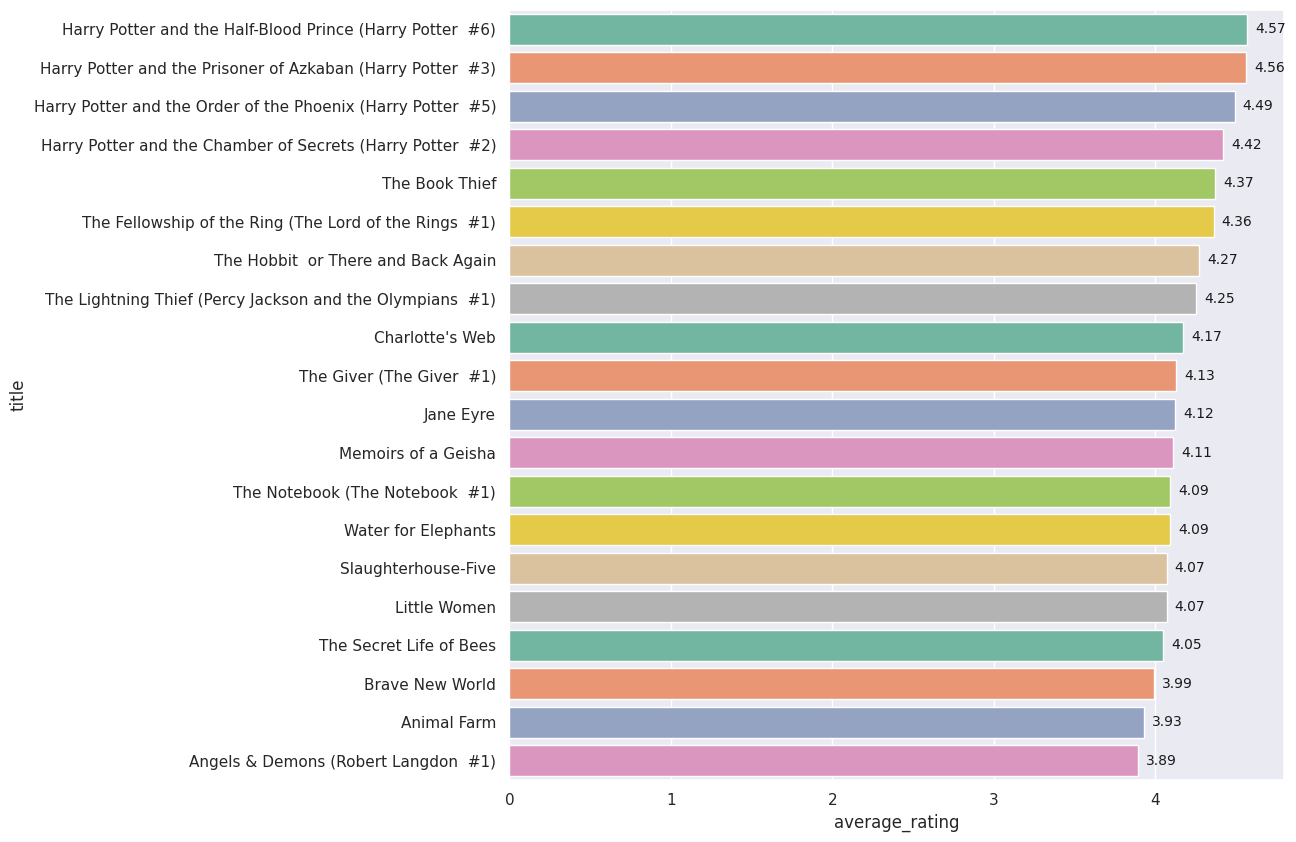

In [48]:
sns.set(style="darkgrid")
plt.figure(figsize=(10, 10))

color = sns.color_palette("Set2")
ax = sns.barplot(x="average_rating", y="title", data=top_books, palette=color)

for i in ax.patches:
    ax.text(i.get_width() + .05, i.get_y() + 0.5, str(i.get_width()), fontsize = 10, color = 'k')
plt.show()

In [51]:
#Top 20 Voted Books

top_vote = data.sort_values(by='ratings_count', ascending=False).head(20)

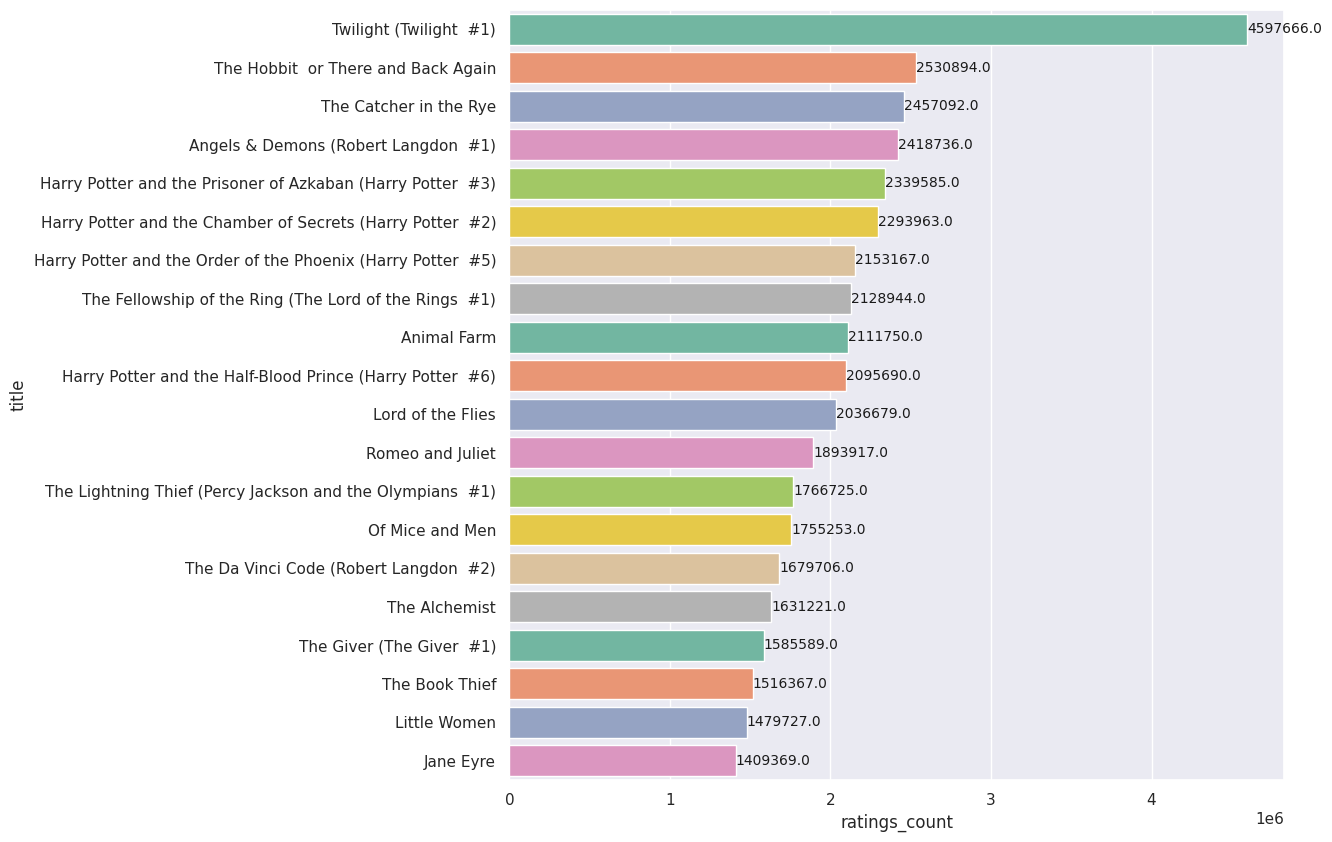

In [52]:
sns.set(style="darkgrid")
plt.figure(figsize=(10, 10))

color = sns.color_palette("Set2")
ax = sns.barplot(x="ratings_count", y="title", data=top_vote, palette=color)

for i in ax.patches:
    ax.text(i.get_width() + .05, i.get_y() + 0.5, str(i.get_width()), fontsize = 10, color = 'k')
plt.show()

In [53]:
#Top rated but not in top voted

list(set(top_books['title'].values) - set(top_vote['title'].values))

['The Notebook (The Notebook  #1)',
 'Memoirs of a Geisha',
 "Charlotte's Web",
 'The Secret Life of Bees',
 'Slaughterhouse-Five',
 'Brave New World',
 'Water for Elephants']

In [54]:
#Top voted but not in top rated

list(set(top_vote['title'].values) - set(top_books['title'].values))

['The Alchemist',
 'Twilight (Twilight  #1)',
 'The Catcher in the Rye',
 'Of Mice and Men',
 'Romeo and Juliet',
 'Lord of the Flies',
 'The Da Vinci Code (Robert Langdon  #2)']

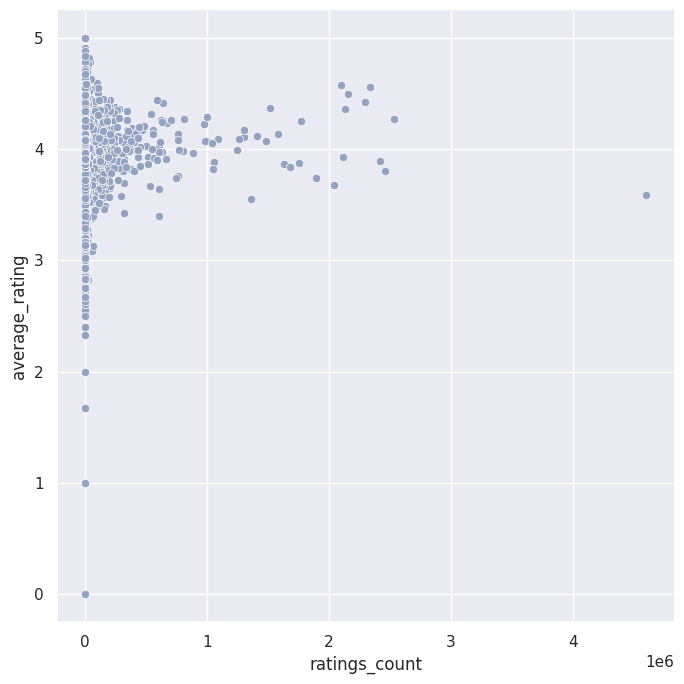

In [55]:
#Relationship between rating and vote

ax = sns.relplot(data=data, x="ratings_count", y="average_rating", color = '#95a3c3', sizes=(100, 200), height=7, marker='o')

In [56]:
data.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


In [60]:
new_data = data.copy()

In [61]:
def fun_only_author(text):
    arlen = text.split('/')
    return arlen[0]


In [62]:
new_data['only_author'] = new_data['authors'].apply(lambda x : fun_only_author(x))

In [63]:

total_rating = new_data.drop_duplicates(subset=['only_author', 'title'], keep='first')
total_rating = total_rating.groupby(by=['only_author']).agg({'average_rating': ['sum']})
total_rating.columns = ['total_rating']
total_rating.reset_index(inplace=True)
total_rating = total_rating.sort_values(by=['total_rating'], ascending=False)
total_rating

,only_author,total_rating
3753,Stephen King,250.79
3006,P.G. Wodehouse,187.31
4161,William Shakespeare,178.45
1603,J.R.R. Tolkien,172.22
3536,Rumiko Takahashi,163.28
...,...,...
146,Andrew Hunt,0.00
1654,James Craig Holte,0.00
1751,Jasmine C.M. Luk,0.00
935,Dobrica Erić,0.00


In [64]:
total_book = new_data.groupby(by=['only_author']).agg({'title': ['nunique']})
total_book.columns = ['total_book']
total_book.reset_index(inplace=True)
total_book = total_book.sort_values(by=['total_book'], ascending=False)
total_book

,only_author,total_book
3753,Stephen King,63
4161,William Shakespeare,45
3006,P.G. Wodehouse,45
29,Agatha Christie,41
1603,J.R.R. Tolkien,41
...,...,...
1727,Jane Parker Resnick,1
1729,Jane Robins,1
1731,Jane Walmsley,1
1732,Jane Werner Watson,1


In [65]:
avg_author = pd.merge(total_book, total_rating, on='only_author', how='outer')
avg_author['average_rating'] = round(avg_author['total_rating'] / avg_author['total_book'], 2)
avg_author = avg_author[avg_author['total_book'] > 26]
avg_author = avg_author.sort_values(by=['average_rating'], ascending=False)
avg_author

,only_author,total_book,total_rating,average_rating
4,J.R.R. Tolkien,41,172.22,4.20
7,Rumiko Takahashi,39,163.28,4.19
11,C.S. Lewis,32,134.02,4.19
2,P.G. Wodehouse,45,187.31,4.16
12,Terry Pratchett,31,127.55,4.11
9,Roald Dahl,35,141.66,4.05
6,Mercedes Lackey,40,160.11,4.00
18,Mark Twain,27,107.68,3.99
0,Stephen King,63,250.79,3.98
1,William Shakespeare,45,178.45,3.97


In [66]:
total_vote = new_data.drop_duplicates(subset=['only_author', 'title'], keep='first')
total_vote.reset_index(inplace=True)
total_vote = total_vote[['only_author', 'title', 'average_rating', 'ratings_count']]
total_vote

,only_author,title,average_rating,ratings_count
0,J.K. Rowling,Harry Potter and the Half-Blood Prince (Harry ...,4.57,2095690
1,J.K. Rowling,Harry Potter and the Order of the Phoenix (Har...,4.49,2153167
2,J.K. Rowling,Harry Potter and the Chamber of Secrets (Harry...,4.42,6333
3,J.K. Rowling,Harry Potter and the Prisoner of Azkaban (Harr...,4.56,2339585
4,J.K. Rowling,Harry Potter Boxed Set Books 1-5 (Harry Potte...,4.78,41428
...,...,...,...,...
10416,William T. Vollmann,Expelled from Eden: A William T. Vollmann Reader,4.06,156
10417,William T. Vollmann,You Bright and Risen Angels,4.08,783
10418,William T. Vollmann,The Ice-Shirt (Seven Dreams #1),3.96,820
10419,William T. Vollmann,Poor People,3.72,769


In [67]:
C = total_vote.average_rating.mean()
C

3.933244410325305

In [68]:
m = total_vote.ratings_count.quantile(0.9)
m

24967.0

In [69]:
total_vote = total_vote[total_vote['ratings_count'] >= m]
total_vote.head()

,only_author,title,average_rating,ratings_count
0,J.K. Rowling,Harry Potter and the Half-Blood Prince (Harry ...,4.57,2095690
1,J.K. Rowling,Harry Potter and the Order of the Phoenix (Har...,4.49,2153167
3,J.K. Rowling,Harry Potter and the Prisoner of Azkaban (Harr...,4.56,2339585
4,J.K. Rowling,Harry Potter Boxed Set Books 1-5 (Harry Potte...,4.78,41428
6,J.K. Rowling,Harry Potter Collection (Harry Potter #1-6),4.73,28242


In [70]:
def weighted_rating(x, m=m, C=C):
    v = x['ratings_count']
    R = x['average_rating']
    return (v/(v+m) * R) + (m/(m+v) * C)

In [71]:
total_vote['score'] = total_vote.apply(weighted_rating, axis=1)

In [73]:
#Ascending order of rating

total_vote = total_vote.sort_values(by='score', ascending=False).head(20)
total_vote

,only_author,title,average_rating,ratings_count,score
0,J.K. Rowling,Harry Potter and the Half-Blood Prince (Harry ...,4.57,2095690,4.562503
3,J.K. Rowling,Harry Potter and the Prisoner of Azkaban (Harr...,4.56,2339585,4.553382
1,J.K. Rowling,Harry Potter and the Order of the Phoenix (Har...,4.49,2153167,4.483618
4,J.K. Rowling,Harry Potter Boxed Set Books 1-5 (Harry Potte...,4.78,41428,4.461588
20,J.R.R. Tolkien,J.R.R. Tolkien 4-Book Boxed Set: The Hobbit an...,4.59,101233,4.460070
3955,Art Spiegelman,The Complete Maus,4.55,111475,4.437142
6137,Bill Watterson,The Complete Calvin and Hobbes,4.82,32213,4.432808
3965,J.R.R. Tolkien,The Two Towers (The Lord of the Rings #2),4.44,593467,4.419542
269,Hiromu Arakawa,Fullmetal Alchemist Vol. 1 (Fullmetal Alchemi...,4.50,111091,4.395999
6138,Bill Watterson,The Calvin and Hobbes Tenth Anniversary Book,4.63,49122,4.395203


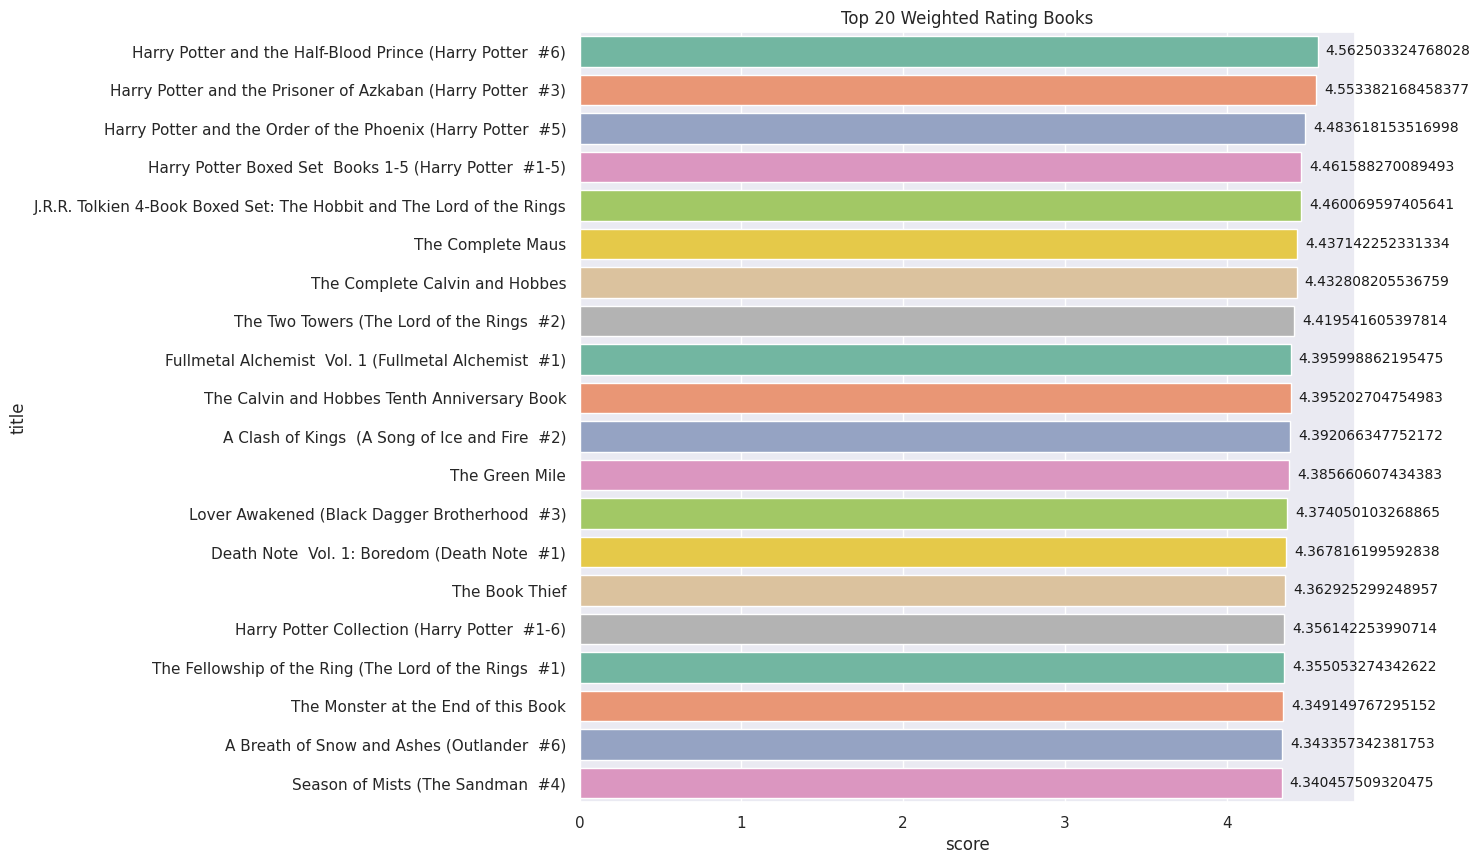

In [74]:
sns.set(style="darkgrid")
plt.figure(figsize=(10, 10))

color = sns.color_palette("Set2")
ax = sns.barplot(x="score", y="title", data=total_vote, palette=color)

for i in ax.patches:
    ax.text(i.get_width() + .05, i.get_y() + 0.5, str(i.get_width()), fontsize = 10, color = 'k')
plt.title("Top 20 Weighted Rating Books")
plt.show()

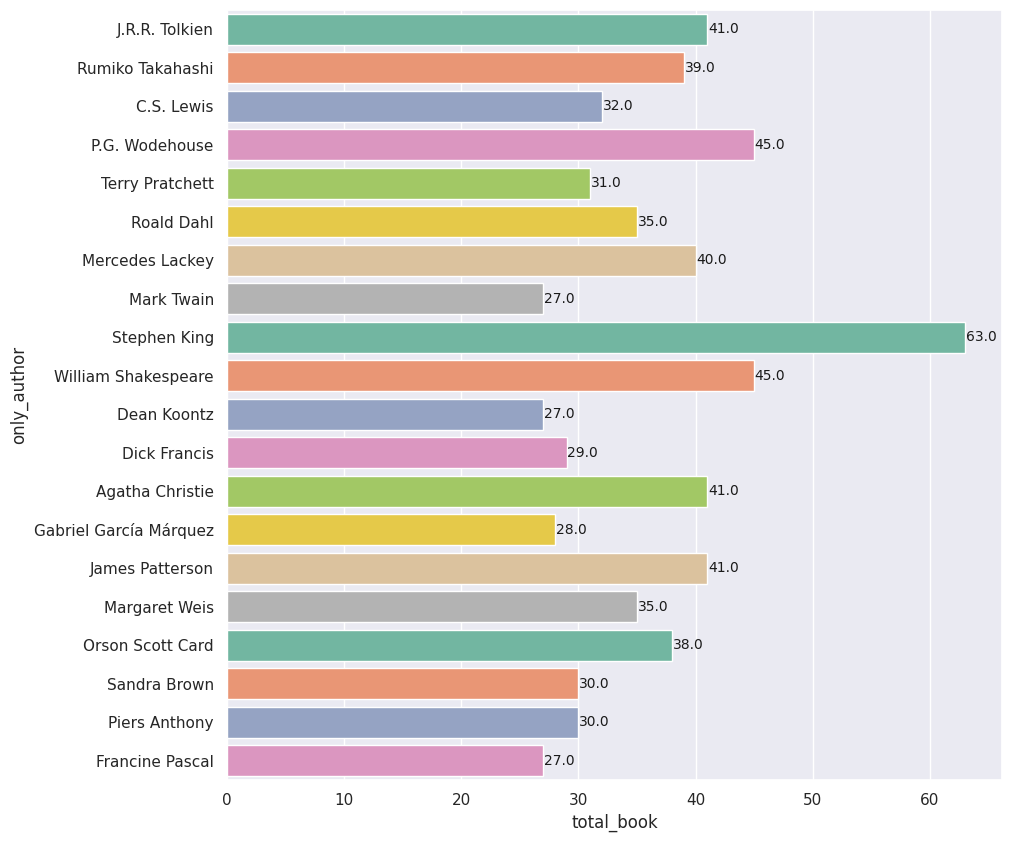

In [75]:
#Most books of an author

sns.set(style="darkgrid")
plt.figure(figsize=(10, 10))

color = sns.color_palette("Set2")
ax = sns.barplot(x="total_book", y="only_author", data=avg_author, palette=color)

for i in ax.patches:
    ax.text(i.get_width() + .05, i.get_y() + 0.5, str(i.get_width()), fontsize = 10, color = 'k')
plt.show()

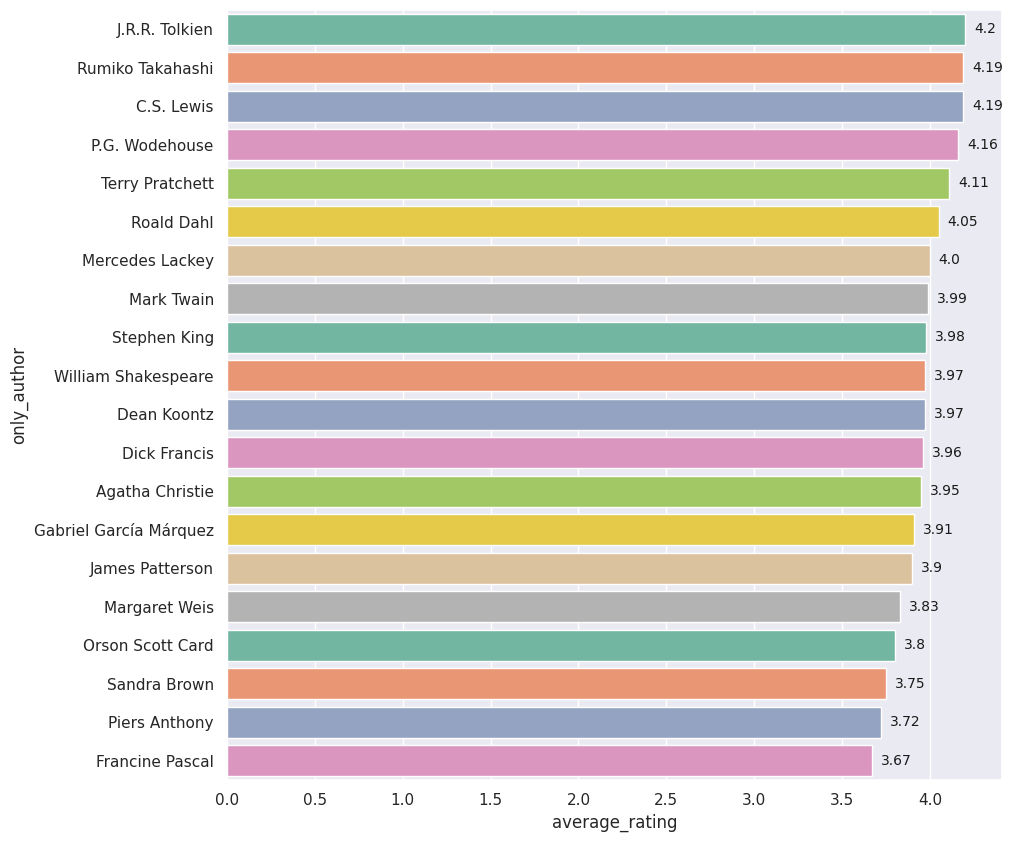

In [76]:
#Average rating of an author

sns.set(style="darkgrid")
plt.figure(figsize=(10, 10))

color = sns.color_palette("Set2")
ax = sns.barplot(x="average_rating", y="only_author", data=avg_author, palette=color)

for i in ax.patches:
    ax.text(i.get_width() + .05, i.get_y() + 0.5, str(i.get_width()), fontsize = 10, color = 'k')
plt.show()

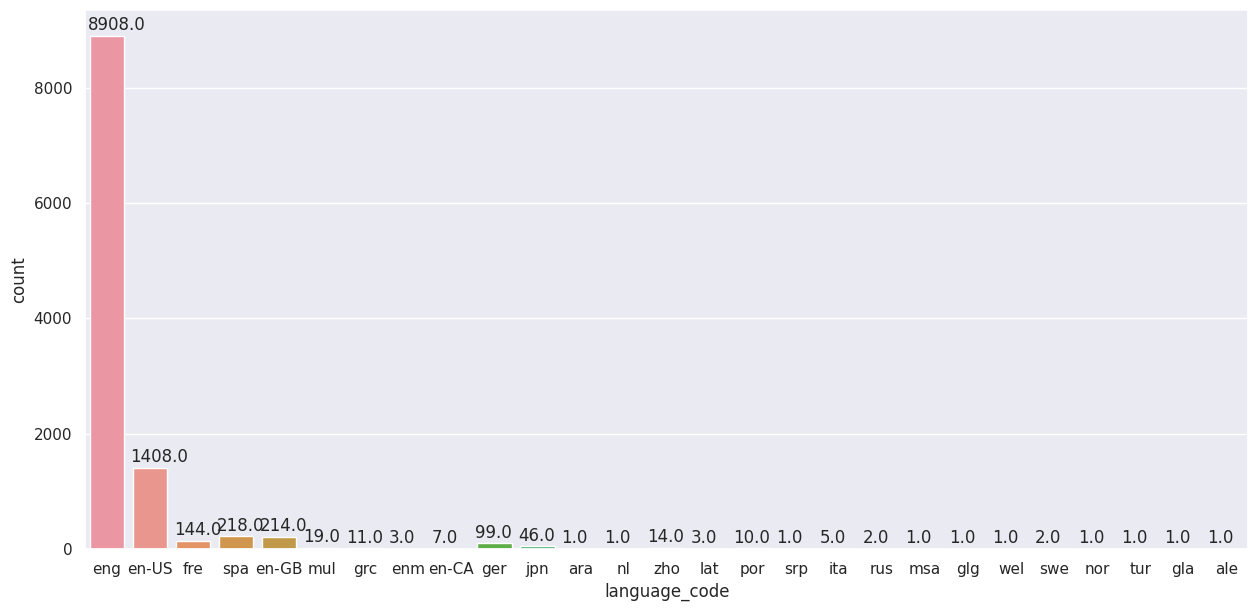

In [77]:
#Language Distribution

plt.figure(figsize=(15, 7))
ax = sns.countplot(x=data.language_code, data=data)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x()-0.05, p.get_height()+100))

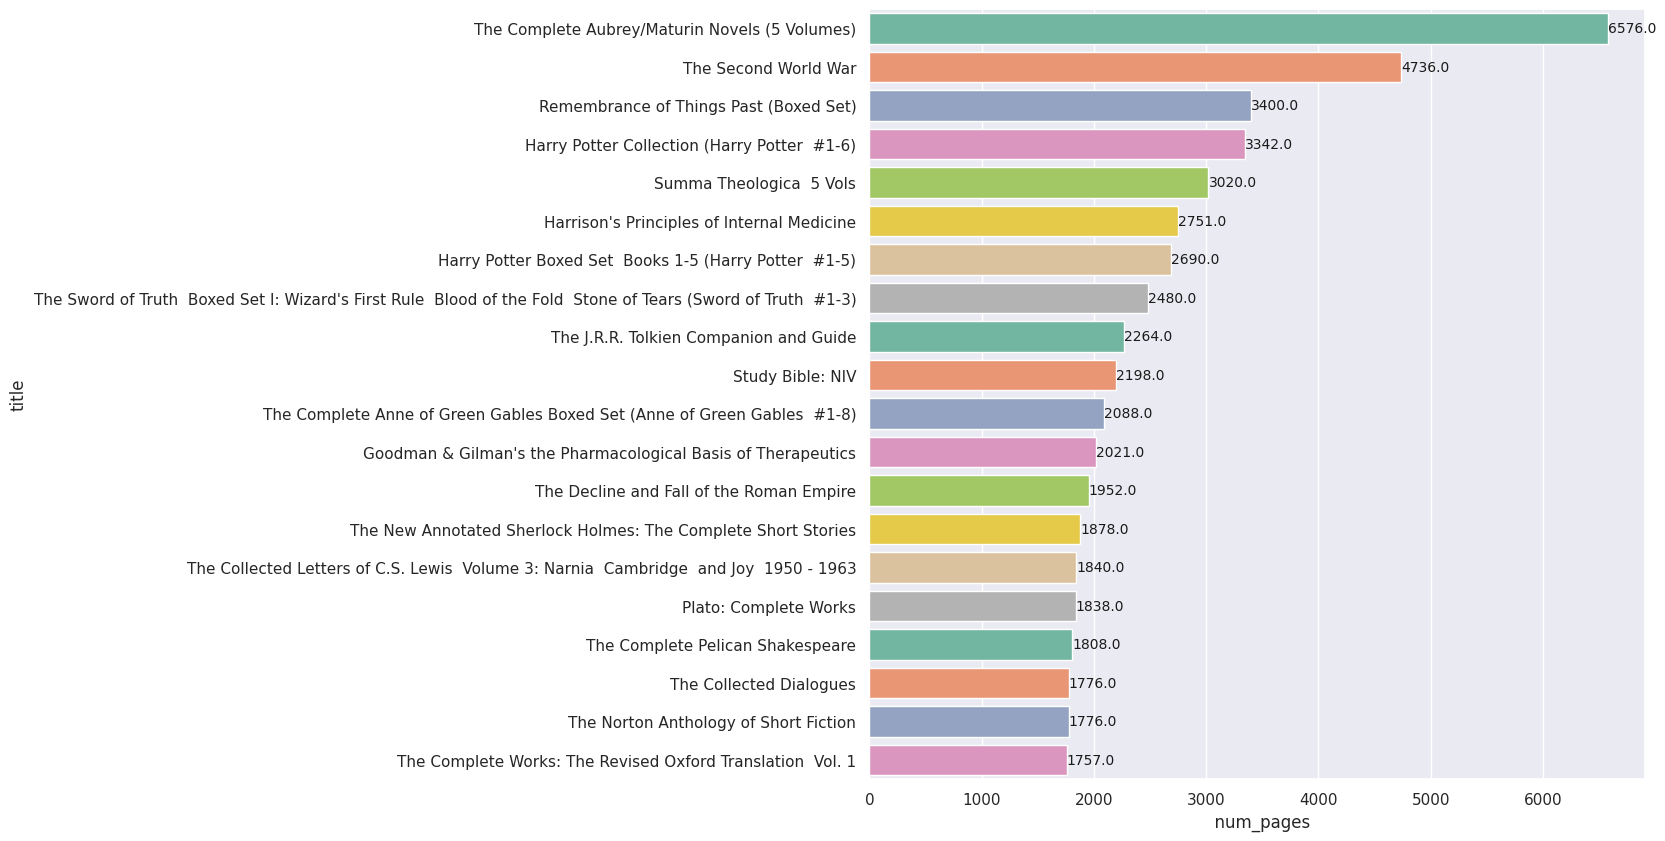

In [78]:
#Top 20 voted books

top_pages = data.sort_values(by='  num_pages', ascending=False).head(20)
sns.set(style="darkgrid")
plt.figure(figsize=(10, 10))

color = sns.color_palette("Set2")
ax = sns.barplot(x="  num_pages", y="title", data=top_pages, palette=color)

for i in ax.patches:
    ax.text(i.get_width() + .05, i.get_y() + 0.5, str(i.get_width()), fontsize = 10, color = 'k')
plt.show()

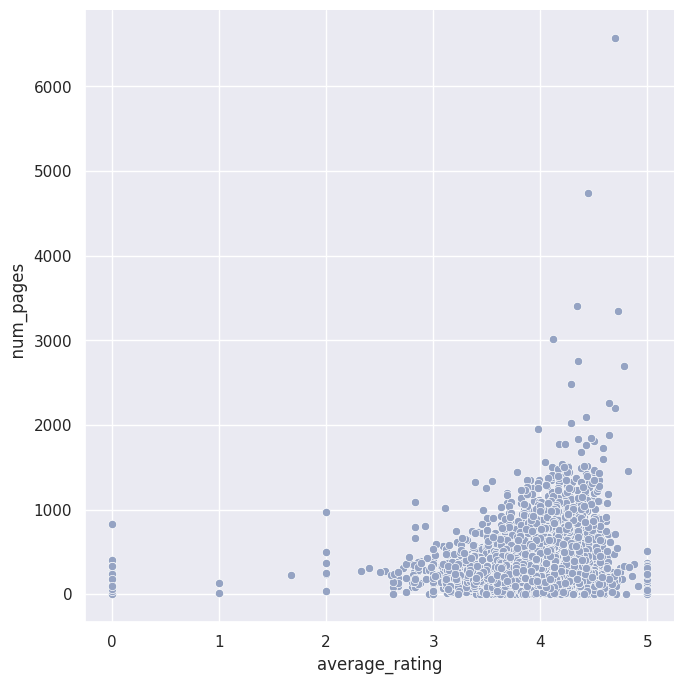

In [79]:
#Relation b/w rating and pages

ax = sns.relplot(data=data, x="average_rating", y="  num_pages", color = '#95a3c3', sizes=(100, 200), height=7, marker='o')

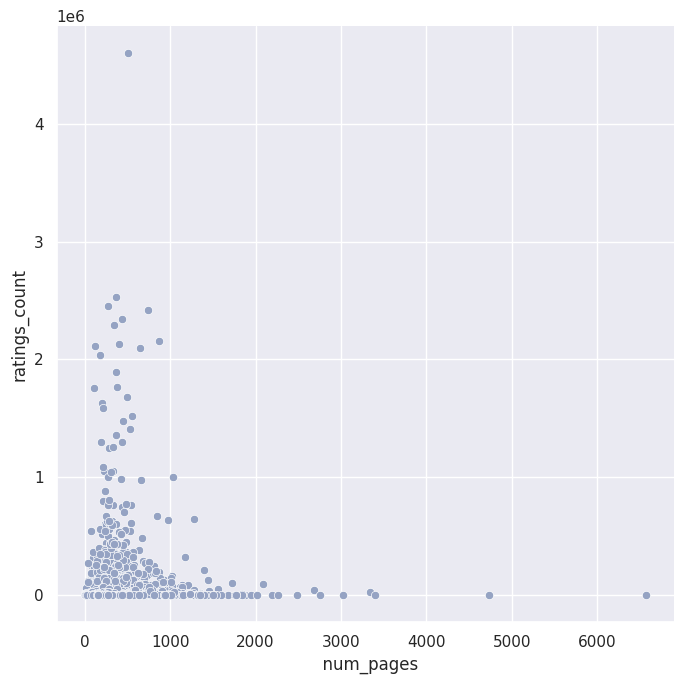

In [80]:
#Relationship between pages and ratings_count

ax = sns.relplot(data=data, x="  num_pages", y="ratings_count", color = '#95a3c3', sizes=(100, 200), height=7, marker='o')

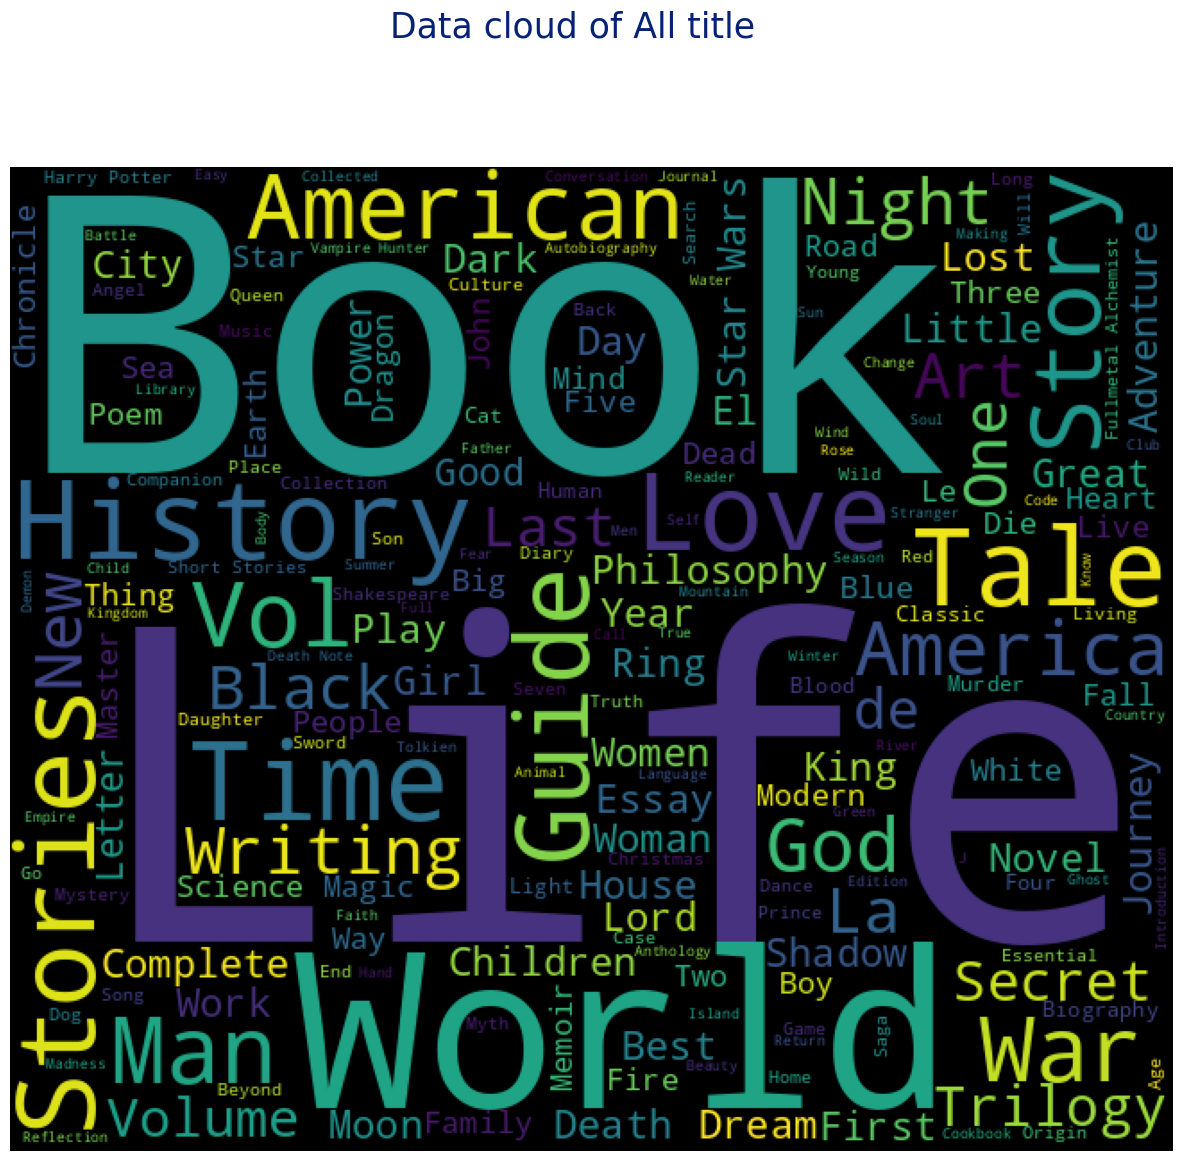

In [81]:
#Data cloud of All title

title_value = data.title.unique()
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
plt.subplots(figsize=(15,15))
wordcloud = WordCloud(
                          background_color='#000',
                          width=650,
                          height=550,
                          stopwords=STOPWORDS,
                         ).generate(" ".join(title_value))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('graph.png')

plt.figtext(.5,.91,'Data cloud of All title', color='#062175', fontsize=25, ha='center')
plt.show()

In [ ]:
#Recommendation Engine

In [82]:
len(new_data.only_author.unique())

4215

In [83]:
new_data.loc[ (new_data['average_rating'] >= 0) & (new_data['average_rating'] <= 1), 'rating_between'] = "between_0_to_1"
new_data.loc[ (new_data['average_rating'] > 1) & (new_data['average_rating'] <= 2), 'rating_between'] = "between_1_to_2"
new_data.loc[ (new_data['average_rating'] > 2) & (new_data['average_rating'] <= 3), 'rating_between'] = "between_2_to_3"
new_data.loc[ (new_data['average_rating'] > 3) & (new_data['average_rating'] <= 4), 'rating_between'] = "between_3_to_4"
new_data.loc[ (new_data['average_rating'] > 4) & (new_data['average_rating'] <= 5), 'rating_between'] = "between_4_to_5"
new_data.head(2)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,only_author,rating_between
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,J.K. Rowling,between_4_to_5
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.,J.K. Rowling,between_4_to_5


In [84]:
trial = new_data[['average_rating', 'ratings_count']]
data_model = np.asarray([np.asarray(trial['average_rating']), np.asarray(trial['ratings_count'])]).T
data_model

array([[4.570000e+00, 2.095690e+06],
       [4.490000e+00, 2.153167e+06],
       [4.420000e+00, 6.333000e+03],
       ...,
       [3.960000e+00, 8.200000e+02],
       [3.720000e+00, 7.690000e+02],
       [3.910000e+00, 1.130000e+02]])

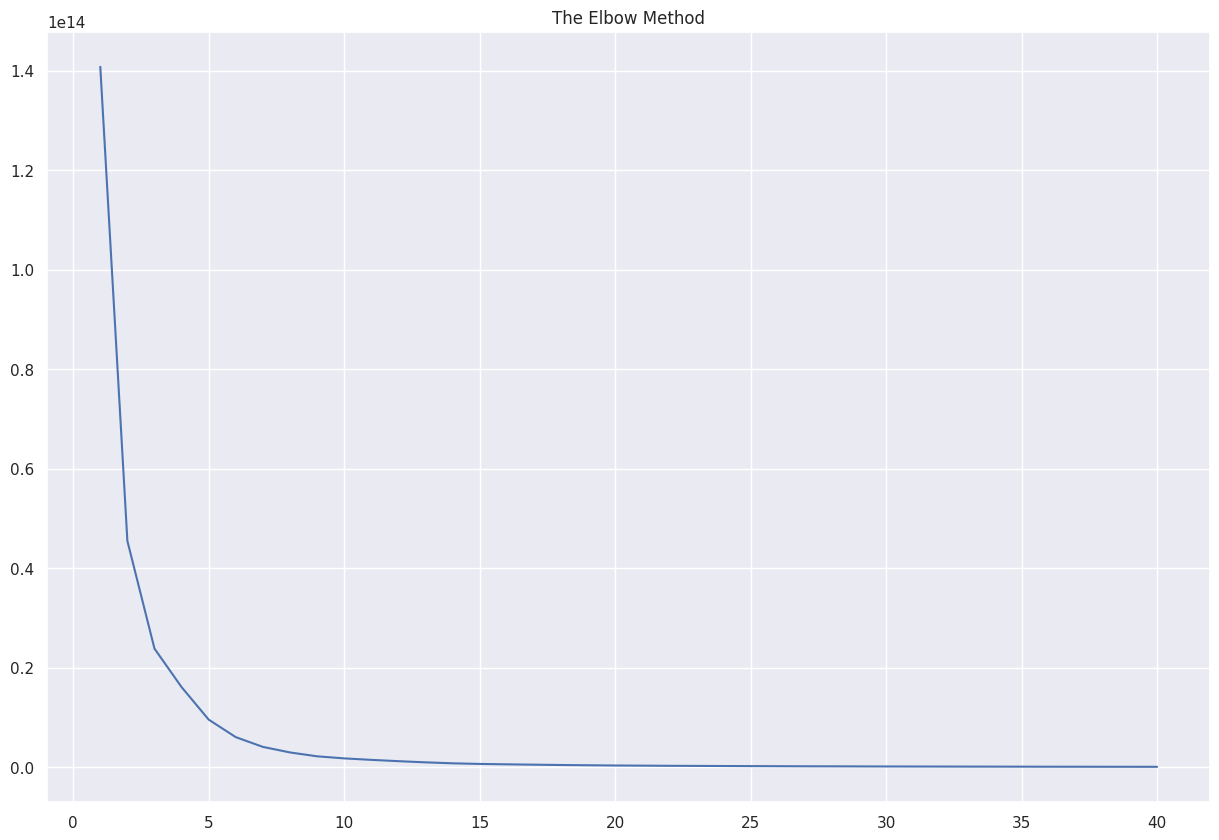

In [85]:
from sklearn.cluster import KMeans
# Elbow Method

score = []
x = data_model
for cluster in range(1,41):
    kmeans = KMeans(n_clusters = cluster, init="k-means++", random_state=40)
    kmeans.fit(x)
    score.append(kmeans.inertia_)
# plotting the score
plt.figure(figsize=(15, 10))
plt.plot(range(1,41), score)
plt.title('The Elbow Method')
# plt.xlabel('no of clusters')
# plt.ylabel('wcss')
plt.show()

In [86]:
rating_between_df = new_data['rating_between'].str.get_dummies(sep=",")
rating_between_df.head()

,between_0_to_1,between_1_to_2,between_2_to_3,between_3_to_4,between_4_to_5
0,0,0,0,0,1
1,0,0,0,0,1
2,0,0,0,0,1
3,0,0,0,0,1
4,0,0,0,0,1


In [87]:
lang_df = new_data['language_code'].str.get_dummies(sep=",")
lang_df.head()

,ale,ara,en-CA,en-GB,en-US,eng,enm,fre,ger,gla,...,nl,nor,por,rus,spa,srp,swe,tur,wel,zho
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [88]:
engine_features = pd.concat([rating_between_df, lang_df, new_data['average_rating'], new_data['ratings_count']], axis=1)
engine_features.head()

,between_0_to_1,between_1_to_2,between_2_to_3,between_3_to_4,between_4_to_5,ale,ara,en-CA,en-GB,en-US,...,por,rus,spa,srp,swe,tur,wel,zho,average_rating,ratings_count
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4.57,2095690
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4.49,2153167
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4.42,6333
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4.56,2339585
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4.78,41428


In [89]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
engine_features = min_max_scaler.fit_transform(engine_features)
from sklearn import neighbors
engine_model = neighbors.NearestNeighbors(n_neighbors=6, algorithm='ball_tree')
engine_model.fit(engine_features)

NearestNeighbors(algorithm='ball_tree', n_neighbors=6)

In [90]:
dist, idlist = engine_model.kneighbors(engine_features)

In [91]:
def book_recommendation_engine(book_name):
    book_list_name = []
    book_id = new_data[new_data['title'] == book_name].index
    book_id = book_id[0]
#     print('book_id', book_id)
    for newid in idlist[book_id]:
#         print(newid)
        book_list_name.append(new_data.loc[newid].title)
#         print(new_data.loc[newid].title)
    return book_list_name

In [92]:
book_list_name = book_recommendation_engine('The Da Vinci Code (Robert Langdon  #2)')
book_list_name

['The Da Vinci Code (Robert Langdon  #2)',
 'The Alchemist',
 'Of Mice and Men',
 'Romeo and Juliet',
 'Lord of the Flies',
 'Eat  Pray  Love']